# Basic Raster Tools

In this section we will review the process for generating raster cells, visualize them and export them as Geotif.
This is for checking that the new raster layer is working.
'WorldPop'

In [1]:
%matplotlib inline
import sys
import django
import matplotlib.pyplot as plt
sys.path.append('/apps')
django.setup()
## Use the ggplot style
plt.style.use('ggplot')

## How to create a polygon compatible with geospatial ?
1 . First we'll need a WKT representation of the polygon we want to parse.


In [27]:
## old
polystr = "POLYGON((-109 27,-106 27,-106 30,-109 30,-109 27))"
##  new includes mexicocity
#polystr = "POLYGON((-99.25033614366057577 19.76525414041762829,-98.75410610295071479 19.76238022126293714,-98.75123218379603429 19.1703528753967376,-99.30302466149656482 19.16843692929361254,-99.25033614366057577 19.76525414041762829))"
#polystr = "POLYGON((72.02907835754290033 30.459889480844204,72.11192992143367064 26.56586597797776506,79.48571910771268278 26.15160815852388865,77.91153939378794746 33.276842653130565,77.91153939378794746 33.276842653130565,72.02907835754290033 30.459889480844204))"
#polystr = "POLYGON((-75.09008341911597029 -8.13344965205141079,-67.45448329094210749 -8.38243661275273411,-66.62452675527103452 -9.12939749485669694,-66.29254414100260817 -10.37433229836330639,-66.54153110170392438 -10.95530187333305605,-66.87351371597236493 -11.20428883403437226,-67.7034702516434379 -11.70226275543701888,-68.78241374801582708 -11.61926710186990874,-69.28038766941847371 -11.70226275543701888,-69.36338332298556963 -12.69821059824230502,-67.37148763737499735 -12.61521494467519489,-66.29254414100260817 -13.27918017321205468,-66.1265528338684021 -14.35812366958444386,-66.70752240883814466 -15.85204543379236952,-68.78241374801582708 -16.84799327659765567,-70.77430943362639937 -16.68200196946344249,-73.51316600134093449 -16.43301500876211918,-75.75404864765282298 -16.18402804806080297,-75.09008341911597029 -8.13344965205141079))"
#polystr = "MULTIPOLYGON(((-80.19334399999996776 -3.03472199999993109,-80.21139499999998179 -3.03666700000002265,-80.21694899999994277 -3.03638899999992873,-80.26055899999994381 -3.02499999999997726,-80.26583900000002814 -3.0233339999999771,-80.27084399999995412 -3.02111099999996213,-80.27305599999994001 -3.01694499999996424,-80.27444500000001426 -3.01138900000000831,-80.26583900000002814 -2.86472199999997201,-80.26501499999994849 -2.85083300000002282,-80.26194799999996121 -2.83999999999991815,-80.25805699999995113 -2.82999999999998408,-80.24027999999992744 -2.79222199999998111,-80.20945699999992939 -2.7280559999999241,-80.20668000000000575 -2.72416700000002265,-80.0877839999999992 -2.67472299999997176,-80.08277900000001637 -2.67277799999999388,-80.03834499999999252 -2.66361100000000306,-80.01972999999998137 -2.66222199999998566,-80.00195300000001453 -2.66555599999998094,-79.90306099999997969 -2.71972199999993336,-79.90251199999994469 -2.72444499999994605,-79.910842999999943 -2.74416700000000446,-79.92028799999997091 -2.75805599999995366,-79.92750499999999647 -2.76472200000000612,-80.12361099999992575 -2.88833399999998619,-80.1002809999999954 -2.9461109999999735,-80.10000599999995075 -2.95249999999992951,-80.10111999999992349 -2.95861100000001898,-80.1113889999999742 -2.99722200000002204,-80.11306799999999839 -3.00277799999992112,-80.11805700000002162 -3.01138900000000831,-80.12194799999991801 -3.01472199999994928,-80.12667799999996987 -3.016666999999984,-80.19334399999996776 -3.03472199999993109)),((-79.83862299999998413 -2.64194500000002108,-79.85583500000001322 -2.64472199999994473,-79.87918099999996002 -2.63972199999994928,-79.88334699999995792 -2.63666699999998855,-79.88583399999993162 -2.63249999999999318,-79.88694800000001806 -2.62694499999997788,-79.88667299999991656 -2.62000000000000455,-79.88195799999999736 -2.58944500000001199,-79.87972999999993817 -2.57777800000002344,-79.85667399999999816 -2.46666699999991579,-79.85389699999996083 -2.46749999999991587,-79.85139500000002499 -2.47166699999996808,-79.84167500000000928 -2.48916699999995217,-79.83029199999998582 -2.51166699999998855,-79.82444800000001806 -2.52638899999993782,-79.82167099999998072 -2.54361199999999599,-79.82861300000001847 -2.63111099999997577,-79.82972699999999122 -2.63749999999998863,-79.83862299999998413 -2.64194500000002108)),((-89.62112400000000889 -1.40666699999997036,-89.62640399999997953 -1.40805599999998776,-89.65333599999991065 -1.40749999999997044,-89.68223599999998896 -1.40194500000001199,-89.70945699999998624 -1.38972199999994928,-89.7505649999999946 -1.37055599999996502,-89.75334199999991824 -1.36638899999996966,-89.75195300000001453 -1.36083300000001373,-89.74917600000003404 -1.35666700000001583,-89.74166900000000169 -1.35055599999992637,-89.73222399999991694 -1.346388999999931,-89.71223399999990988 -1.34305599999993319,-89.6483459999999468 -1.34388899999993328,-89.6397249999999417 -1.34861099999994849,-89.60945099999997865 -1.37583399999999756,-89.60751299999998309 -1.38083299999993869,-89.60778799999997091 -1.38694500000002563,-89.61279300000001058 -1.40138899999999467,-89.62112400000000889 -1.40666699999997036)),((-90.43444799999997485 -1.35527799999994158,-90.44056699999998727 -1.35611099999994167,-90.44667099999992388 -1.35527799999994158,-90.46334799999999632 -1.35277799999994386,-90.46890300000001162 -1.35138899999992645,-90.49334699999991471 -1.33611099999995986,-90.49694799999997485 -1.33277799999996205,-90.51667800000001307 -1.31444499999992104,-90.52305599999994001 -1.30666699999994762,-90.48918200000002798 -1.22527799999994613,-90.48167399999999816 -1.21916699999997036,-90.47639500000002499 -1.2177780000000098,-90.43583699999993541 -1.2183329999999728,-90.3713989999999967 -1.26083399999998846,-90.36805700000002162 -1.26444499999996651,-90.36584499999997888 -1.26916699999998173,-90.36527999999992744 -1.27527800000001434,-90.36584499999997888 -1.28138899999993328,-90.3700099999999793 -1.29111100000000079,-90.37278699999995979 -1.29499999999995907,-90.39666699999997945 -1.32583399999998619,-90.40972899999991341 -1.34027799999995523,-90.41334499999993568 -1.34388899999993328,-90.42973299999999881 -1.35333300000002055,-90.43444799999997485 -1.35527799999994158)),((-90.04333500000001322 -0.83888899999999467,-90.04806500000000824 -0.83944499999995514,-90.05416899999994484 -0.83888899999999467,-90.08306900000002315 -0.829166999999984,-90.08500699999996186 -0.82444500000002563,-90.08555599999999686 -0.81138899999996283,-90.08222999999998137 -0.80111099999999169,-90.0719450000000279 -0.80055599999997185,-90.04861499999998387 -0.80444499999998698,-90.03973400000000993 -0.80944499999998243,-90.03723099999996293 -0.81361099999998032,-90.03556799999995519 -0.81888900000001286,-90.03639199999992115 -0.83194400000002133,-90.03916900000001533 -0.8361110000000167,-90.04333500000001322 -0.83888899999999467)),((-89.44361900000001242 -0.93666699999999992,-89.5333400000000097 -0.95861099999996213,-89.54556299999995872 -0.95722200000000157,-89.62640399999997953 -0.93138900000002423,-89.62945600000000468 -0.92722199999997201,-89.6272279999999455 -0.91555599999998094,-89.62112400000000889 -0.90111100000001443,-89.61778299999997444 -0.89777800000001662,-89.61000100000001112 -0.89166699999992716,-89.59222399999998743 -0.88194499999997333,-89.57778899999993882 -0.87583300000000008,-89.55667099999993752 -0.86277799999993476,-89.54028299999998808 -0.8519439999999463,-89.47695899999990843 -0.80666699999994762,-89.47361799999993082 -0.80305599999996957,-89.46833799999996018 -0.77444399999995994,-89.46334799999993947 -0.76555599999994683,-89.44889799999998559 -0.74500000000000455,-89.44555699999995113 -0.7413890000000265,-89.42167699999998831 -0.72444500000000289,-89.41751099999999042 -0.72166699999996808,-89.36195399999991196 -0.69083299999999781,-89.3502809999999954 -0.68888899999996056,-89.32833900000002814 -0.6861109999999826,-89.31556699999993043 -0.68527799999998251,-89.2586210000000051 -0.6875,-89.25584400000002461 -0.69138899999995829,-89.2475130000000263 -0.70388899999994692,-89.24500999999992246 -0.70805599999999913,-89.26055899999994381 -0.74694499999992559,-89.27500899999995454 -0.76694499999996424,-89.30584699999997156 -0.80194399999999177,-89.41416900000001533 -0.91833299999996143,-89.41751099999999042 -0.92166699999995672,-89.43861399999997275 -0.93472200000002204,-89.44361900000001242 -0.93666699999999992)),((-90.26055900000000065 -0.75111099999992348,-90.33862299999992729 -0.78138899999993328,-90.43055699999996477 -0.77027799999996205,-90.535842999999943 -0.69499999999993634,-90.54333499999995638 -0.68888899999996056,-90.5511169999999197 -0.63527800000002799,-90.55029299999995374 -0.63055600000001277,-90.53861999999992349 -0.5941670000000272,-90.53527800000000525 -0.58388899999994237,-90.5086210000000051 -0.5488889999999742,-90.5022279999999455 -0.54138899999998102,-90.48806799999994155 -0.52833299999991823,-90.45445299999994404 -0.51388899999994919,-90.33111600000000863 -0.5016669999999408,-90.29194599999993898 -0.49833300000000236,-90.19056699999993043 -0.54277799999994158,-90.18362399999995205 -0.54972199999997429,-90.17889400000001388 -0.56527799999997796,-90.17834499999997888 -0.57166699999999082,-90.17889400000001388 -0.5777779999999666,-90.18917799999996987 -0.65666699999997036,-90.19667099999998072 -0.68333300000000463,-90.20278899999999567 -0.69083299999999781,-90.25140399999997953 -0.74638900000002195,-90.25556899999997995 -0.74916699999999992,-90.26055900000000065 -0.75111099999992348)),((-91.49890099999998938 -0.49611099999998487,-91.50418099999996002 -0.49611099999998487,-91.61250299999994695 -0.44833299999999099,-91.63917499999996608 -0.41333300000002282,-91.65223699999995688 -0.38527799999997114,-91.66389500000002499 -0.31611099999997805,-91.63223299999998517 -0.29138899999992418,-91.48278799999997091 -0.2502779999999234,-91.47111499999994066 -0.24805600000001959,-91.46694899999994277 -0.25083299999994324,-91.43890399999992269 -0.27083299999998189,-91.40417499999995243 -0.3044439999999895,-91.40139799999997194 -0.30833300000000463,-91.39944499999995742 -0.31333299999994324,-91.39527899999995952 -0.32972200000000385,-91.3961180000000013 -0.43722200000001976,-91.39723199999997405 -0.44277799999991885,-91.40333599999991065 -0.45722200000000157,-91.40695199999998977 -0.46055599999999686,-91.42111199999999371 -0.46666699999997263,-91.49890099999998938 -0.49611099999998487)),((-90.54750099999995427 -0.30500000000000682,-90.58250399999997171 -0.35916700000001356,-90.5852809999999522 -0.36333300000001145,-90.58862299999998413 -0.36666700000000674,-90.60111999999998034 -0.375,-90.60583500000001322 -0.37555600000001732,-90.67083699999994906 -0.34888899999998557,-90.68806499999993775 -0.34694399999995085,-90.69416799999999057 -0.34749999999996817,-90.72167999999993526 -0.3544449999999415,-90.73112500000002001 -0.35722199999997883,-90.73722799999995914 -0.35777799999993931,-90.74362200000001621 -0.35722199999997883,-90.82444800000001806 -0.33916699999997491,-90.82861300000001847 -0.33666699999997718,-90.87445099999996501 -0.26999999999998181,-90.83473199999997405 -0.17694399999993493,-90.81750499999992599 -0.15972199999998793,-90.80944799999997485 -0.15416699999997263,-90.79333500000001322 -0.14944400000001679,-90.74751299999996945 -0.16305599999998321,-90.67695599999996148 -0.18777799999998024,-90.66223100000001978 -0.19333299999999554,-90.64361600000000863 -0.20083299999998871,-90.62222299999996267 -0.21388899999993782,-90.61389199999996436 -0.21944400000000996,-90.59889199999992115 -0.23166699999995899,-90.55139199999996436 -0.27888899999993555,-90.54750099999995427 -0.29833300000001373,-90.54750099999995427 -0.30500000000000682)),((-91.21890300000001162 -0.01111100000002807,-91.21444700000000694 -0.01305599999994911,-91.2066799999999489 -0.01916699999992488,-91.20333900000002814 -0.02944400000001224,-91.20251499999994849 -0.03583299999996825,-91.19805899999994381 -0.09111099999995531,-91.19917299999991656 -0.11444399999999177,-91.20333900000002814 -0.13083299999993869,-91.20195000000001073 -0.14333299999992732,-91.18833899999998494 -0.20305599999994683,-91.18695099999996501 -0.20833299999992505,-91.18223599999993212 -0.21805599999999004,-91.17028799999997091 -0.24055600000002642,-91.10667399999994132 -0.30916699999994535,-91.07528699999994615 -0.32555600000000595,-91.04917899999998099 -0.34055599999999231,-91.04528800000002775 -0.3433329999999728,-91.03750599999995075 -0.34944399999994857,-91.01972999999998137 -0.36611099999993257,-90.99917600000003404 -0.38666699999998855,-90.96417199999996228 -0.42277799999999388,-90.94778400000001284 -0.52305599999999686,-90.94889799999998559 -0.52833299999991823,-90.96139499999998179 -0.5474999999999568,-90.96417199999996228 -0.55166700000000901,-90.90306099999992284 -0.62916699999993853,-90.87918100000001687 -0.65305599999999231,-90.85444599999999582 -0.6805559999999673,-90.81083699999999226 -0.73249999999995907,-90.87445099999996501 -0.91555599999998094,-90.91890000000000782 -0.96222199999994018,-90.92639199999996436 -0.9683329999999728,-90.93055699999996477 -0.96972199999993336,-91.16223100000001978 -1.0319449999999506,-91.16778599999997823 -1.033333999999968,-91.20056199999993396 -1.03472199999998793,-91.21778899999992518 -1.02444500000001426,-91.29528800000002775 -1.01555600000000368,-91.32055699999995113 -1.0136110000000258,-91.34306300000002921 -1.01833299999992732,-91.34861799999993082 -1.01972200000000157,-91.36917099999999436 -1.02666699999997491,-91.37611399999997275 -1.02666699999997491,-91.41445899999990843 -1.01833299999992732,-91.42472800000001598 -1.01499999999992951,-91.44056699999998727 -0.99638899999996511,-91.49111900000002606 -0.9238889999999742,-91.49473599999998896 -0.91361100000000306,-91.50140399999997953 -0.89305599999994456,-91.50140399999997953 -0.88749999999993179,-91.49945100000002185 -0.86500000000000909,-91.49722299999996267 -0.86000000000001364,-91.48973099999994929 -0.84694399999995085,-91.47611999999998034 -0.82638900000000604,-91.45472699999999122 -0.79972199999997429,-91.31556699999998727 -0.68805599999996048,-91.31140099999998938 -0.68527799999998251,-91.24027999999992744 -0.66194499999994605,-91.23500099999995427 -0.66194499999994605,-91.21362299999998413 -0.66277799999994613,-91.20056199999993396 -0.67027799999993931,-91.19361900000001242 -0.67722199999991517,-91.1897279999999455 -0.68000000000000682,-91.18055700000002162 -0.68472199999996519,-91.16833499999995638 -0.6861109999999826,-91.16278099999993856 -0.68472199999996519,-91.1583400000000097 -0.68250000000000455,-91.15472399999998743 -0.67916700000000674,-91.09167500000000928 -0.61055599999997412,-91.08416699999997945 -0.59750000000002501,-91.08195499999999356 -0.5927780000000098,-91.08056599999991931 -0.58722199999994018,-91.08277899999995952 -0.58249999999998181,-91.11222799999995914 -0.55027799999993476,-91.11695900000000847 -0.54833299999995688,-91.12390099999998938 -0.54833299999995688,-91.13473499999997784 -0.55111099999993485,-91.14834600000000364 -0.55111099999993485,-91.15417500000000928 -0.54972199999997429,-91.15750099999996792 -0.54611099999993939,-91.3597260000000233 -0.3044439999999895,-91.40640300000001162 -0.23166699999995899,-91.40888999999992848 -0.22749999999996362,-91.40972899999997026 -0.21472199999993791,-91.40640300000001162 -0.20416699999992716,-91.40000900000001138 -0.19666699999999082,-91.39388999999994212 -0.17277799999993704,-91.40333599999991065 -0.1069439999999986,-91.41584799999998268 -0.05083299999995461,-91.42056300000001556 -0.03499999999996817,-91.42472800000001598 -0.02555599999999458,-91.43167099999993752 -0.01861100000002125,-91.43556200000000445 -0.0158329999999296,-91.45222499999999854 -0.0116669999999317,-91.4658359999999675 -0.0116669999999317,-91.47750899999999774 -0.0136110000000258,-91.50418099999996002 -0.02138899999994237,-91.52056900000002315 -0.0322219999999902,-91.52806099999997969 -0.03861100000000306,-91.54167199999994864 -0.05222199999997201,-91.54583699999994906 -0.05499999999994998,-91.55000299999994695 -0.0561109999999303,-91.56777999999997064 -0.05499999999994998,-91.572783999999956 -0.05277799999993249,-91.57972699999993438 -0.04611099999993939,-91.60166900000001533 -0.01999999999992497,-91.60612500000002001 -0.01111100000002807,-91.60583500000001322 -0.00499999999999545,-91.60362199999991617 0,-91.53861999999992349 0.03083300000002964,-91.40000900000001138 0.11916700000000446,-91.3836210000000051 0.13027800000008938,-91.31500199999993583 0.11500000000000909,-91.31556699999998727 0.10888899999991963,-91.3130649999999946 0.08833299999997735,-91.27584799999999632 0.02111100000013266,-91.2594450000000279 0.00333299999999781,-91.25535600000000613 0,-91.22944599999999582 -0.00749999999999318,-91.21890300000001162 -0.01111100000002807)),((-90.45916699999992261 0.26638900000000376,-90.48112499999996317 0.26111100000014176,-90.52917499999995243 0.28972200000004023,-90.535842999999943 0.29666700000001356,-90.53807100000000219 0.30138899999991509,-90.54278599999992139 0.31722200000007206,-90.54278599999992139 0.32277800000008483,-90.54139700000001767 0.32833299999998644,-90.53807100000000219 0.33861100000001443,-90.535842999999943 0.34333299999991596,-90.53250100000002476 0.34666700000008177,-90.52833599999991065 0.34944400000000542,-90.4847260000000233 0.36444399999999177,-90.47889700000001767 0.36444399999999177,-90.46612499999997681 0.36111100000005081,-90.44056699999998727 0.34666700000008177,-90.4083400000000097 0.32694400000013957,-90.40362499999997681 0.31805599999995593,-90.40362499999997681 0.3125,-90.40583800000001702 0.30777800000009847,-90.41334499999993568 0.29472200000003568,-90.4214020000000005 0.2822219999999902,-90.45361300000001847 0.26777800000002117,-90.45916699999992261 0.26638900000000376)),((-90.75111400000002959 0.5474999999999568,-90.75500499999998283 0.54611099999999624,-90.76083399999993162 0.5474999999999568,-90.78195199999993292 0.55361100000004626,-90.79556299999995872 0.56055500000013581,-90.79972799999995914 0.56333300000011377,-90.80056799999994155 0.5694440000000327,-90.80445900000000847 0.63444400000003043,-90.80389399999995703 0.64083300000004328,-90.79972799999995914 0.64833300000009331,-90.79223599999994576 0.65166700000008859,-90.78195199999993292 0.64833300000009331,-90.77778599999993503 0.64555500000011534,-90.75111400000002959 0.61750000000000682,-90.74694799999991801 0.60777800000010984,-90.74139400000001388 0.58583299999997962,-90.74139400000001388 0.57222200000001067,-90.74417099999993752 0.56111099999992575,-90.74751299999996945 0.5508330000000683,-90.75111400000002959 0.5474999999999568)),((-78.91223099999996293 1.23916599999995469,-78.95695499999993672 1.23527799999999388,-78.96250900000001138 1.23694399999999405,-78.97056599999996251 1.24249999999994998,-78.99722299999996267 1.26999999999998181,-78.99890099999998938 1.27499999999997726,-78.99833699999999226 1.2808329999999728,-78.9869539999999688 1.29694399999999632,-78.97528099999993856 1.31277800000003708,-78.96473699999995688 1.32249999999993406,-78.90750100000002476 1.36666700000000674,-78.90333599999991065 1.36777800000010075,-78.89889499999992495 1.35888900000003332,-78.8961180000000013 1.34166599999997516,-78.89472999999992453 1.32472200000012208,-78.89472999999992453 1.26833300000009785,-78.90223700000001372 1.24833300000011604,-78.90722699999997758 1.23972199999997201,-78.91223099999996293 1.23916599999995469)),((-78.59167500000000928 1.24305500000002667,-78.56028699999995979 1.19861100000014176,-78.54305999999996857 1.20888900000005606,-78.53723100000001978 1.20999999999992269,-78.47334299999999985 1.19777800000014167,-78.46861299999994799 1.19555500000006987,-78.46473700000001372 1.19277799999997569,-78.45945699999992939 1.18444399999998495,-78.45584099999996397 1.17472199999991744,-78.44473299999998517 1.15805599999998776,-78.43833899999992809 1.15083300000009103,-78.35945100000003549 1.07333299999999099,-78.34806800000001203 1.06416700000011133,-78.33222999999998137 1.05277799999993249,-78.31279000000000678 1.04472200000009252,-78.30750999999992246 1.04305600000009235,-78.28361499999994066 1.03888900000009698,-78.2552799999999138 1.03250000000008413,-78.24139400000001388 1.02722199999999475,-78.23001099999993357 1.01805500000006077,-78.17529299999995374 0.97055599999998776,-78.1083370000000059 0.92138900000009016,-78.09167500000000928 0.91055500000004486,-78.07000699999997551 0.90444400000012592,-78.03889499999996815 0.90083299999997735,-78.0252839999999992 0.90027800000007119,-78.00279199999999946 0.90444400000012592,-77.99583400000000211 0.90416699999997263,-77.92973299999999881 0.87527800000009393,-77.88972499999999854 0.82972200000006069,-77.87695299999995768 0.82194400000003043,-77.86195399999991196 0.81611100000009174,-77.84583999999995285 0.81138899999996283,-77.81417799999991303 0.80833300000006147,-77.78723100000001978 0.82499999999993179,-77.77278100000000904 0.83083299999992732,-77.71444699999995009 0.84583300000008421,-77.70251500000000533 0.84749999999996817,-77.69111599999996542 0.84500000000008413,-77.68640099999993254 0.84277800000006664,-77.67834499999997888 0.83722200000011071,-77.65571599999992713 0.8146239999999807,-77.65695199999993292 0.80416700000000674,-77.66166699999990897 0.78138900000004696,-77.66027800000000525 0.75611100000003262,-77.65833999999995285 0.7449999999999477,-77.65362500000003365 0.73611100000005081,-77.64028899999999567 0.72166700000008177,-77.62472499999995534 0.71083300000003646,-77.58000199999997903 0.68611100000003944,-77.56529199999994262 0.67388900000003105,-77.54167199999994864 0.65611100000006672,-77.53001399999993737 0.65527800000006664,-77.51779199999998582 0.65611100000006672,-77.50917099999998072 0.66083299999996825,-77.49917600000003404 0.66416699999996354,-77.48750299999994695 0.66638899999998102,-77.47611999999992349 0.66361100000000306,-77.46694899999999961 0.65944400000000769,-77.45945699999992939 0.65333300000008876,-77.45251499999994849 0.64583300000003874,-77.44445799999999736 0.62722200000007433,-77.44250499999992599 0.61638900000008334,-77.44445799999999736 0.59027800000006891,-77.44805899999994381 0.57999999999998408,-77.4522249999999417 0.55583300000006375,-77.4522249999999417 0.54361100000005536,-77.45001199999995833 0.53277800000012121,-77.42723099999994929 0.42444399999999405,-77.4244539999999688 0.41333300000013651,-77.41833500000001322 0.40666700000014089,-77.37945599999994784 0.38472200000001067,-77.31722999999993817 0.36472200000002886,-77.30612199999995937 0.3613889999999742,-77.21890299999995477 0.33611100000013039,-77.19738799999998946 0.3345540000000824,-77.18611099999992575 0.33527800000013031,-77.07960500000001502 0.35955999999998767,-77.04084799999992583 0.31000000000011596,-77.02972399999993058 0.30250000000000909,-76.8802799999999138 0.2427780000000439,-76.86889600000000655 0.23861100000010538,-76.85861199999999371 0.23805599999997185,-76.81140099999993254 0.24138900000008334,-76.77027900000001637 0.24888900000013336,-76.72695899999996527 0.25861100000003034,-76.72695899999996527 0.26750000000009777,-76.72138999999998532 0.28055599999999004,-76.71194499999995742 0.28583300000013878,-76.61750799999998662 0.26138900000000831,-76.60640000000000782 0.25638900000001286,-76.58944700000000694 0.23527799999999388,-76.58029199999992898 0.22638900000009698,-76.57167099999992388 0.22166700000002493,-76.56167600000003404 0.21944400000012365,-76.55029300000001058 0.21805600000004688,-76.54000899999999774 0.22027800000000752,-76.44862399999999525 0.24694399999998495,-76.4077909999999747 0.27166700000009314,-76.40084799999999632 0.3923190000001,-76.24305700000002162 0.39555500000000166,-76.14527899999995952 0.37083300000011832,-76.04327399999993986 0.33999200000005203,-76.0369569999999726 0.33527800000013031,-76.02487199999995937 0.32012600000001612,-75.98028599999997823 0.25638900000001286,-75.91278099999993856 0.16333299999996598,-75.76640299999996842 0.05027800000004845,-75.75527999999997064 0.04333300000007512,-75.74223299999994197 0.0372220000000425,-75.73001099999999042 0.03444400000000769,-75.71890300000001162 0.03527800000011894,-75.69862399999993841 0.04194400000011456,-75.68945300000001453 0.04416700000001583,-75.58334399999995412 0.0372220000000425,-75.56750499999998283 0.02638900000005151,-75.51888999999999896 -0.00805599999995366,-75.43444799999991801 -0.05944399999992811,-75.40444899999999961 -0.07111099999991666,-75.39361600000000863 -0.07305600000000823,-75.35528599999997823 -0.07666699999998627,-75.34417700000000195 -0.07999999999998408,-75.3255619999999908 -0.08833299999997735,-75.30723599999998896 -0.09777800000000525,-75.29278599999997823 -0.10666700000001583,-75.285842999999943 -0.11972199999996747,-75.30528300000003128 -0.13472200000001067,-75.34417700000000195 -0.14999999999997726,-75.35528599999997823 -0.15249999999997499,-75.41890000000000782 -0.16499999999996362,-75.43112199999995937 -0.16361099999994622,-75.47167999999993526 -0.14916699999997718,-75.48806799999999839 -0.13833299999993187,-75.51083399999993162 -0.11916699999994762,-75.52111799999994446 -0.11555599999996957,-75.5333400000000097 -0.11361099999999169,-75.60778800000002775 -0.10527799999999843,-75.61973599999998896 -0.10666700000001583,-75.62795999999997321 -0.10885899999999538,-75.62624399999992875 -0.16811899999999014,-75.62611400000002959 -0.17250000000001364,-75.6255649999999946 -0.17527799999993476,-75.6225889999999481 -0.17751199999992195,-75.61677600000001576 -0.17848099999991973,-75.57556199999993396 -0.17944399999993266,-75.56945799999999736 -0.18000000000000682,-75.56417799999991303 -0.18166700000000446,-75.4855649999999514 -0.22666699999996354,-75.47889699999996083 -0.23361099999999624,-75.47445700000002944 -0.24249999999994998,-75.46473699999995688 -0.27361099999995986,-75.45916699999997945 -0.29500000000001592,-75.44862399999999525 -0.33805599999999458,-75.4491729999999734 -0.3519439999999463,-75.44805900000000065 -0.35722199999997883,-75.43444799999991801 -0.38416699999999082,-75.4172360000000026 -0.41333300000002282,-75.4094539999999256 -0.42583299999995461,-75.38945000000001073 -0.44694399999991674,-75.3638920000000212 -0.46666699999997263,-75.34806799999995519 -0.46361099999995758,-75.34194899999994277 -0.46305599999999458,-75.3366699999999696 -0.46444399999995767,-75.33250399999997171 -0.46749999999997272,-75.26251200000001518 -0.52305599999999686,-75.24612399999995205 -0.55416700000000674,-75.24417099999999436 -0.55916700000000219,-75.24362199999995937 -0.56527799999997796,-75.2450099999999793 -0.61972199999996747,-75.24583399999994526 -0.62583299999994324,-75.25083899999998494 -0.63472200000001067,-75.25445599999994784 -0.63805600000000595,-75.26696800000001986 -0.64603999999997086,-75.27723699999995688 -0.65027899999995498,-75.28343199999994795 -0.65621499999997468,-75.29278599999997823 -0.73055599999997867,-75.26333599999998114 -0.81472199999996064,-75.21705599999995684 -0.96000600000002123,-75.21608000000003358 -0.96533599999997932,-75.2171170000000302 -0.97606199999995624,-75.32501199999995833 -0.98111099999999851,-75.33584600000000364 -0.97833300000002055,-75.35583500000001322 -0.97083300000002737,-75.36334199999998873 -0.96472199999993791,-75.37695300000001453 -0.95083299999998871,-75.40223700000001372 -0.92277799999993704,-75.43194599999992533 -1.03805599999998321,-75.44416799999999057 -1.08555599999994001,-75.46167000000002645 -1.15361099999995531,-75.48361199999999371 -1.24194499999993013,-75.55361899999996922 -1.51388900000000604,-75.55917399999998452 -1.53416699999996808,-75.5687259999999128 -1.54574600000000828,-75.58818099999996321 -1.55570699999998396,-75.62728099999992537 -1.59637499999996635,-75.71972700000003442 -1.70805599999999913,-75.78140300000001162 -1.78194500000000744,-75.9775089999999409 -2.01638900000000376,-76.07417299999991656 -2.13111099999997577,-76.40390000000002146 -2.38027799999991885,-76.66062899999991487 -2.5721349999999461,-76.90444899999994277 -2.6566670000000272,-77.04333500000001322 -2.70472200000000385,-77.22416699999996581 -2.76722200000000385,-77.4397279999999455 -2.84138899999993555,-77.79444899999992913 -2.96333399999991798,-77.81024199999995972 -2.9681550000000243,-77.85722399999997378 -2.98444499999993695,-77.86195399999991196 -2.98722299999997176,-77.92538499999994883 -3.0399609999999484,-78.02639799999997194 -3.14527800000001889,-78.03279099999991786 -3.15249999999991815,-78.03556800000001203 -3.15666699999997036,-78.04305999999996857 -3.17027799999993931,-78.06722999999999502 -3.21527799999995523,-78.11473099999994929 -3.27444500000001426,-78.11805699999996477 -3.27749999999997499,-78.14140299999996842 -3.29416700000001583,-78.17584199999998873 -3.31416699999999764,-78.19500700000003235 -3.32944500000002108,-78.20584100000002081 -3.33916699999991806,-78.21362299999998413 -3.35194400000000314,-78.21778899999998202 -3.36916699999994762,-78.21389799999997194 -3.37888900000001513,-78.20611600000000863 -3.39138900000000376,-78.19944799999996121 -3.39861199999995733,-78.19445799999999736 -3.40083399999997482,-78.19056699999993043 -3.40361099999995531,-78.18333400000000211 -3.41027799999994841,-78.17668200000002798 -3.41722199999992426,-78.17417899999998099 -3.42138899999991963,-78.16890000000000782 -3.43694399999998268,-78.16890000000000782 -3.44999999999993179,-78.17028799999997091 -3.45527800000002117,-78.17417899999998099 -3.46555599999999231,-78.18139600000000655 -3.47222199999998793,-78.23194899999998597 -3.51861099999996441,-78.23667899999998099 -3.52055599999994229,-78.24223299999999881 -3.52166699999992261,-78.24917599999997719 -3.52138899999994237,-78.25389100000001008 -3.51916699999992488,-78.25584399999996776 -3.51694499999996424,-78.25306699999998727 -3.45861100000001898,-78.25279199999994262 -3.44499999999993634,-78.25584399999996776 -3.43444499999998243,-78.260283999999956 -3.42555599999997185,-78.2630619999999908 -3.42111199999999371,-78.26640299999991157 -3.41777799999999843,-78.27444499999995742 -3.41194500000000289,-78.28445399999998244 -3.40805599999993092,-78.29833999999999605 -3.40750000000002728,-78.30445900000000847 -3.40805599999993092,-78.32139599999999291 -3.41166700000002265,-78.33750899999995454 -3.42277799999999388,-78.34611499999999751 -3.43499999999994543,-78.35223400000000993 -3.45666699999992488,-78.36666899999994484 -3.51249999999998863,-78.36917099999999436 -3.52416699999992034,-78.37083399999994526 -3.53666700000002265,-78.37056000000001177 -3.54277799999999843,-78.36778300000003128 -3.55999999999994543,-78.36666899999994484 -3.57249999999999091,-78.36695899999995163 -3.57944499999996424,-78.37194799999991801 -3.63083399999993617,-78.37306200000000445 -3.63694500000002563,-78.38862599999998793 -3.7113889999999401,-78.39639299999993227 -3.73861099999999169,-78.40251199999994469 -3.75361199999991868,-78.41166699999990897 -3.77249999999997954,-78.41667200000000548 -3.78055599999999004,-78.42099000000001752 -3.78585399999991523,-78.46667500000000928 -3.83249999999992497,-78.53167699999994511 -3.91277800000000298,-78.54084799999998268 -3.9319449999999847,-78.55168200000002798 -3.96999999999997044,-78.55555700000002162 -3.98722299999991492,-78.55612199999995937 -4.00083399999999756,-78.55473299999999881 -4.01944400000002133,-78.55555700000002162 -4.04694499999993695,-78.55806000000001177 -4.07305600000000823,-78.56361400000002959 -4.09555599999993092,-78.6380619999999908 -4.27138899999999921,-78.64500399999997171 -4.28555599999992864,-78.65417500000000928 -4.29722299999991719,-78.65806600000001936 -4.30027899999998908,-78.66281900000001315 -4.30259299999994482,-78.67207299999995485 -4.30709399999994957,-78.67250100000001112 -4.34027900000000955,-78.67111199999993687 -4.36055599999991728,-78.66917399999999816 -4.36972200000002431,-78.65861499999994066 -4.41472199999998338,-78.65444899999994277 -4.41750000000001819,-78.65061200000002373 -4.41871299999996836,-78.6491699999999696 -4.41916799999995646,-78.65028399999994235 -4.47361199999994597,-78.66307099999994534 -4.54277799999994158,-78.66555800000003273 -4.55444499999993013,-78.66805999999991172 -4.55916700000000219,-78.67056300000001556 -4.56305600000001732,-78.68139599999994971 -4.57305600000000823,-78.68583699999999226 -4.57583399999998619,-78.70902999999998428 -4.58478700000000572,-78.71583599999991065 -4.58638999999993757,-78.73112500000002001 -4.59138999999993302,-78.76722699999999122 -4.60388899999998102,-78.79084799999992583 -4.61416699999995217,-78.81556699999998727 -4.63027899999991632,-78.83195499999993672 -4.641666999999984,-78.85612499999996317 -4.65861099999995076,-78.86250300000000379 -4.66444499999994378,-78.87611399999997275 -4.67722200000002886,-78.90611300000000483 -4.71666699999991579,-78.91639699999996083 -4.73444499999993695,-78.91833500000001322 -4.73916699999995217,-78.91944899999998597 -4.74527799999992794,-78.92028800000002775 -4.76583399999998392,-78.91862500000002001 -4.78472199999993109,-78.91751099999993357 -4.79000100000001794,-78.92861900000002606 -4.86833400000000438,-79.01139799999998559 -4.97222199999993109,-79.03666699999996581 -4.99555599999996502,-79.05482499999993706 -5.0091319999999655,-79.06083699999999226 -5.00138999999995804,-79.068587999999977 -4.99535800000001018,-79.0852809999999522 -4.98408899999992627,-79.10192899999992733 -4.97335899999995945,-79.10694899999998597 -4.97138999999992848,-79.18362400000000889 -4.96388899999993782,-79.20361300000001847 -4.96250099999997474,-79.23191799999995055 -4.96385099999992008,-79.28056299999997236 -4.96583399999997255,-79.29084799999992583 -4.96333399999997482,-79.36556999999993423 -4.88611099999997123,-79.43333399999994526 -4.81583399999993844,-79.44000199999999268 -4.80888899999996511,-79.44528199999996332 -4.80027899999998908,-79.447234999999921 -4.79527899999999363,-79.44862399999999525 -4.78972199999992654,-79.45167500000002292 -4.76638900000000376,-79.5133359999999243 -4.6252779999999234,-79.51722699999999122 -4.61555599999996957,-79.52166699999992261 -4.59333400000002712,-79.52056900000002315 -4.58027799999996432,-79.51834099999996397 -4.57555599999994911,-79.53916899999995849 -4.52083399999992253,-79.61527999999998428 -4.45194500000002336,-79.62750199999993583 -4.44305600000001277,-79.6366729999999734 -4.43805600000001732,-79.64973399999990988 -4.43277799999992794,-79.66278099999993856 -4.43277799999992794,-79.67333999999999605 -4.43583399999994299,-79.69723499999997784 -4.44611200000002782,-79.70112599999993108 -4.45611199999996188,-79.70889299999998912 -4.4622229999999945,-79.71389799999997194 -4.46388899999999467,-79.77806099999992284 -4.48083400000001575,-79.78945899999990843 -4.48305599999991955,-79.80168199999997114 -4.48250000000001592,-79.81361400000002959 -4.48000000000001819,-79.82362399999993841 -4.47638899999992645,-79.99778700000001663 -4.37305600000001959,-80.01945499999993672 -4.35972299999991719,-80.03083799999996018 -4.35027799999994613,-80.05750999999992246 -4.32166699999993398,-80.0600130000000263 -4.31749999999993861,-80.07389799999998559 -4.30305599999996957,-80.08195499999999356 -4.29722299999991719,-80.13459799999998268 -4.28449100000000271,-80.16833500000001322 -4.29111199999999826,-80.17250100000001112 -4.29361199999999599,-80.17611699999997654 -4.2969449999999938,-80.18139599999994971 -4.31249999999994316,-80.18362400000000889 -4.31722299999995585,-80.18945300000001453 -4.32527800000002571,-80.22639500000002499 -4.36444499999993241,-80.26222199999995155 -4.39749999999992269,-80.32778899999993882 -4.44861100000002807,-80.34056099999992284 -4.45638900000000149,-80.35389699999996083 -4.46333399999997482,-80.36334199999993189 -4.46777799999995295,-80.39056399999998348 -4.47861199999994142,-80.40972899999997026 -4.47166700000002493,-80.45973199999997405 -4.44472300000001042,-80.46778899999998202 -4.43889000000001488,-80.47778299999998808 -4.42805599999996957,-80.48140000000000782 -4.41833399999995891,-80.48278800000002775 -4.41277800000000298,-80.48306300000001556 -4.4066670000000272,-80.48194899999998597 -4.39361199999996188,-80.47805799999997589 -4.38333399999999074,-80.4325099999999793 -4.31749999999993861,-80.42973299999994197 -4.3136119999999778,-80.40583799999996018 -4.28916700000002038,-80.39250199999992219 -4.27444499999995742,-80.38612399999993841 -4.26722200000000385,-80.37972999999999502 -4.25972300000000814,-80.3408359999999675 -4.20833399999992253,-80.33555599999999686 -4.19944499999996879,-80.33612099999999145 -4.19611199999997098,-80.34861799999998766 -4.1941669999999931,-80.37417600000003404 -4.19527799999997342,-80.39167799999995623 -4.19805599999995138,-80.40084799999999632 -4.20249999999998636,-80.40417499999995243 -4.20583299999992732,-80.41223100000001978 -4.21166699999992034,-80.42500300000000379 -4.21944500000000744,-80.4355619999999476 -4.22250100000002249,-80.44168100000001687 -4.22277800000000525,-80.447783999999956 -4.22194500000000517,-80.45722999999992453 -4.21750100000002703,-80.46055599999994001 -4.21388899999993782,-80.46861300000000483 -4.20111199999996643,-80.47889699999996083 -4.18416700000000219,-80.48083500000001322 -4.17916700000000674,-80.48167399999994132 -4.16666699999996126,-80.48361199999999371 -4.11444499999998925,-80.50122099999998682 -4.05534599999998591,-80.50167799999996987 -4.05027899999993224,-80.46722399999993058 -3.98694499999993468,-80.46362299999998413 -3.98361199999993687,-80.42333999999999605 -3.97833300000002055,-80.41723599999994576 -3.97777799999994386,-80.39222699999999122 -3.97888899999992418,-80.38612399999993841 -3.97916700000001811,-80.35555999999991172 -3.99083400000000665,-80.35084499999993568 -3.99305600000002414,-80.34278899999998202 -3.99888899999996283,-80.33361799999994446 -4.01027900000002546,-80.32890299999991157 -4.01250099999992926,-80.322783999999956 -4.01333399999992935,-80.31639100000001008 -4.01305599999994911,-80.30778499999991027 -4.00777799999997342,-80.2922360000000026 -3.99611099999998487,-80.17529300000001058 -3.90305599999993547,-80.1533359999999675 -3.8842279999999505,-80.17361499999998387 -3.86305599999997185,-80.17973299999999881 -3.85527799999994158,-80.21139499999998179 -3.73916699999995217,-80.20777900000001637 -3.71722299999993311,-80.20584099999996397 -3.64638899999999921,-80.20638999999999896 -3.62694499999997788,-80.21278399999994235 -3.59583400000002484,-80.23500100000001112 -3.49722200000002204,-80.25389099999995324 -3.42083400000001348,-80.25778199999996332 -3.41777799999999843,-80.26251200000001518 -3.4155559999999241,-80.34042399999998452 -3.38051699999999755,-80.32362399999993841 -3.35972299999997404,-80.29139700000001767 -3.3283329999999296,-80.28001399999993737 -3.3283329999999296,-80.27250700000001871 -3.33527800000001662,-80.26750199999992219 -3.34222299999998995,-80.25973499999997784 -3.34861100000000533,-80.14279199999998582 -3.33472299999993993,-80.02111799999994446 -3.2616669999999317,-79.96139499999992495 -3.21305599999993774,-79.95445300000000088 -3.20666699999998173,-79.94805900000000065 -3.19833399999998846,-79.94528199999996332 -3.18805600000001732,-79.94306899999992311 -3.17555599999997185,-79.94111599999996542 -3.1497229999999945,-79.92388900000003105 -3.09638899999998785,-79.92028799999997091 -3.0858339999999771,-79.91334499999999252 -3.07888900000000376,-79.89222699999999122 -3.05888899999996511,-79.88417099999992388 -3.03861100000000306,-79.87779199999999946 -3.01861099999996441,-79.8597260000000233 -2.91277799999994613,-79.83168000000000575 -2.80305600000002642,-79.78111300000000483 -2.65916700000002493,-79.77612299999998413 -2.64999999999992042,-79.76306199999993396 -2.63555599999995138,-79.74000499999999647 -2.61805600000002414,-79.73251299999998309 -2.61111099999993712,-79.72750899999999774 -2.60277799999994386,-79.72611999999992349 -2.59111100000001215,-79.72473100000001978 -2.54944499999999152,-79.72473100000001978 -2.5402780000000007,-79.72834799999998268 -2.53055599999993319,-79.74890099999993254 -2.48472299999997404,-79.77000399999991487 -2.48944499999993241,-79.78250100000002476 -2.48944499999993241,-79.7900089999999409 -2.48333399999995663,-79.7964020000000005 -2.47555599999998321,-79.80139199999996436 -2.46722299999998995,-79.84306300000002921 -2.3866669999999317,-79.8458400000000097 -2.37638899999996056,-79.84445199999993292 -2.36305599999997185,-79.83473200000003089 -2.30805600000002187,-79.84028599999993503 -2.21361099999995758,-79.84390299999995477 -2.20388900000000376,-79.84861799999998766 -2.19472300000001042,-79.85417200000000548 -2.18722200000001976,-79.8088989999999967 -2.07583399999992935,-79.77278100000000904 -2.03611099999994849,-79.76222200000000839 -2.01888900000000149,-79.76362599999998793 -2.00916699999999082,-79.81945799999994051 -2.03416700000002493,-79.82751500000000533 -2.03972199999992654,-79.88000499999992599 -2.08499999999992269,-79.88555899999994381 -2.09249999999997272,-79.8897249999999417 -2.10305599999998094,-79.89527900000001637 -2.1252779999999234,-79.9002839999999992 -2.16000000000002501,-79.90278599999993503 -2.18499999999994543,-79.90362500000003365 -2.19888900000000831,-79.90278599999993503 -2.21138899999999694,-79.89195300000000088 -2.22750000000002046,-79.88473499999997784 -2.2344449999999938,-79.87222299999996267 -2.24972199999996292,-79.86750799999992978 -2.25805599999995366,-79.86445600000001832 -2.26861100000002125,-79.86334199999998873 -2.28111100000000988,-79.86584499999992204 -2.38944500000002336,-79.86944599999998218 -2.42777799999998933,-79.89028899999999567 -2.53333400000002484,-79.89944500000001426 -2.55222199999997201,-79.90501399999999421 -2.55972199999996519,-79.91944899999992913 -2.57305600000000823,-79.92723100000000613 -2.57916699999992716,-79.93556200000000445 -2.58416699999997945,-79.97389199999992115 -2.60083299999996598,-80.00250199999993583 -2.61250000000001137,-80.04695099999997865 -2.5944449999999506,-80.05528299999997444 -2.58888899999999467,-80.06222499999995534 -2.58194400000002133,-80.06722999999993817 -2.56472299999995812,-80.02890000000002146 -2.42638899999991509,-80.00917099999992388 -2.36222299999997176,-80.00167799999996987 -2.35611199999999599,-79.98001099999993357 -2.35111100000000306,-79.97306799999995519 -2.34444500000000744,-79.95584100000002081 -2.3205560000000105,-79.95167500000002292 -2.31027799999992567,-79.96000700000001871 -2.31305600000001732,-80.01501500000000533 -2.33166699999998173,-80.02305599999999686 -2.33805599999993774,-80.02944899999994277 -2.34500000000002728,-80.03445399999998244 -2.35388899999992418,-80.05944799999997485 -2.41249999999996589,-80.07389799999998559 -2.4533329999999296,-80.1025089999999409 -2.50916699999999082,-80.10806300000001556 -2.516666999999984,-80.17361499999998387 -2.58749999999997726,-80.21722399999998743 -2.6263890000000174,-80.2480619999999476 -2.73000000000001819,-80.25639299999994591 -2.73638899999991736,-80.29055799999997589 -2.7280559999999241,-80.31140099999998938 -2.72111099999995076,-80.45611600000000863 -2.63333399999999074,-80.46362299999998413 -2.62722299999995812,-80.56889299999994591 -2.51249999999998863,-80.61750799999998662 -2.45138899999994919,-80.62445099999996501 -2.44444499999997333,-80.66223099999996293 -2.41305599999992637,-80.67806999999999107 -2.39999999999997726,-80.68695100000002185 -2.39416699999998173,-80.72695899999996527 -2.38111099999991893,-80.73918200000002798 -2.37888900000001513,-80.7752839999999992 -2.38249999999993634,-80.78861999999992349 -2.38111099999991893,-80.79917899999998099 -2.37777799999992112,-80.81639100000001008 -2.36722199999996974,-80.89001500000000533 -2.3205560000000105,-80.97500599999995075 -2.21694499999995287,-80.97666899999995849 -2.18499999999994543,-80.93055700000002162 -2.20805599999999913,-80.91944899999992913 -2.20583299999998417,-80.8547360000000026 -2.17527799999999161,-80.79139700000001767 -2.12999999999999545,-80.78361499999999751 -2.12305600000001959,-80.77751199999994469 -2.11611099999993257,-80.76556399999998348 -2.10027799999994613,-80.75584400000002461 -2.08222200000000157,-80.75250199999999268 -2.07166699999993398,-80.73167399999999816 -1.94388899999995601,-80.73028599999997823 -1.93194499999992786,-80.73083500000001322 -1.91944499999993923,-80.73361199999993687 -1.90888899999998785,-80.77389499999998179 -1.76166699999998855,-80.785842999999943 -1.73305599999991955,-80.82014500000002499 -1.67761300000000801,-80.84750400000001491 -1.6186109999999303,-80.85501099999993357 -1.59916699999996581,-80.85528599999997823 -1.5927780000000098,-80.85389699999996083 -1.58749999999992042,-80.8458400000000097 -1.56027799999998251,-80.82139599999993607 -1.49833299999994551,-80.81083699999999226 -1.47555599999992637,-80.80778499999991027 -1.47305599999992864,-80.79528800000002775 -1.47194500000000517,-80.79055799999997589 -1.47027800000000752,-80.78417999999999211 -1.46305599999993774,-80.78140300000001162 -1.45138899999994919,-80.75556899999997995 -1.33527799999995977,-80.75584400000002461 -1.329166999999984,-80.75944499999997106 -1.31944499999991649,-80.76222199999995155 -1.31527799999992112,-80.80944799999991801 -1.24694499999992559,-80.85084499999993568 -1.19305599999995593,-80.88694800000001806 -1.14083299999998644,-80.89222699999999122 -1.13249999999999318,-80.89418000000000575 -1.12777799999992112,-80.91445899999996527 -1.06027799999998251,-80.91555800000003273 -1.05500000000000682,-80.91445899999996527 -1.0419449999999415,-80.91111799999993082 -1.03111099999995304,-80.83917200000001912 -0.93083299999995006,-80.83555599999994001 -0.92749999999995225,-80.83000199999997903 -0.92638899999997193,-80.75723299999998517 -0.91999999999995907,-80.74500999999992246 -0.92055599999997639,-80.71806300000002921 -0.92833299999995234,-80.70472699999999122 -0.92833299999995234,-80.62167399999998452 -0.92777799999993249,-80.61584499999997888 -0.92666699999995217,-80.57945300000000088 -0.90138899999999467,-80.5755619999999908 -0.89805599999994001,-80.56973299999998517 -0.88999999999992951,-80.53527799999994841 -0.82805600000000368,-80.53195199999998977 -0.81722200000001521,-80.53140299999995477 -0.8111109999999826,-80.53028899999998202 -0.77083299999998189,-80.52555799999998953 -0.74027799999993249,-80.52166699999997945 -0.72999999999996135,-80.5005649999999946 -0.68166700000000446,-80.49833699999993541 -0.67694399999999177,-80.44139100000001008 -0.57472199999995155,-80.43806499999993775 -0.57138900000001058,-80.43028299999997444 -0.56583299999999781,-80.42333999999999605 -0.56611099999997805,-80.41862499999996317 -0.56833299999999554,-80.41361999999992349 -0.57666699999998627,-80.41223100000001978 -0.58222199999994473,-80.41250599999995075 -0.60194400000000314,-80.411391999999978 -0.60750000000001592,-80.4094539999999256 -0.61222199999997429,-80.40417499999995243 -0.62083299999994779,-80.39250199999992219 -0.62944399999992129,-80.38223299999998517 -0.63333299999993642,-80.37083400000000211 -0.63583299999993415,-80.3388979999999151 -0.63638900000000831,-80.26888999999994212 -0.62972200000001521,-80.2647249999999417 -0.62722200000001749,-80.26640299999996842 -0.62222199999996519,-80.26972999999998137 -0.61861099999998714,-80.28140300000001162 -0.61611099999998942,-80.31333899999998494 -0.61555599999996957,-80.33168000000000575 -0.61694499999998698,-80.34472700000003442 -0.61694499999998698,-80.37000999999992246 -0.61388899999997193,-80.37861599999996542 -0.60888899999997648,-80.40167199999996228 -0.57027799999997342,-80.4222260000000233 -0.53583299999996825,-80.48779299999995374 -0.41999999999995907,-80.49027999999998428 -0.41555599999998094,-80.49667399999998452 -0.40166699999991806,-80.50083899999998494 -0.38583299999999099,-80.50222800000000234 -0.37416699999999992,-80.50195299999995768 -0.36750000000000682,-80.49972500000001219 -0.36277799999993476,-80.37583899999992809 -0.2197219999999902,-80.36862200000001621 -0.21305599999993774,-80.34028599999999187 -0.18694399999998268,-80.28527800000000525 -0.1558329999999728,-80.27944899999999961 -0.15472199999999248,-80.26667799999995623 -0.15444399999995539,-80.25056499999993775 -0.14499999999998181,-80.24639899999993986 -0.14222200000000385,-80.23222399999991694 -0.12916699999993853,-80.14527899999995952 -0.03861100000000306,-80.13250699999997551 -0.02416699999992034,-80.11299899999994523 0,-80.07055699999995113 0.05805600000007871,-80.06834400000002461 0.06277799999998024,-80.0458370000000059 0.13055599999995593,-80.04055800000003273 0.16055600000009917,-80.03945899999996527 0.17333299999995688,-80.03973399999995308 0.21222199999994018,-80.04194599999993898 0.23000000000007503,-80.04417399999999816 0.24111099999998942,-80.0458370000000059 0.26555600000000368,-80.04501299999998309 0.29277799999994158,-80.04167200000000548 0.35194400000005999,-80.04028299999993123 0.35750000000007276,-80.03611799999993082 0.35861099999999624,-80.00314299999996592 0.34297099999997727,-79.99972499999995534 0.34638899999998785,-79.99751299999996945 0.35083300000002282,-79.99223299999999881 0.36638900000014019,-79.99389600000000655 0.37805600000001505,-80.00083899999992809 0.39000000000010004,-80.00723299999998517 0.39694399999996222,-80.01472499999999854 0.40333299999997507,-80.02111799999994446 0.41055600000004233,-80.02890000000002146 0.42305600000008781,-80.03723100000001978 0.43694400000003952,-80.04084799999998268 0.44666700000004766,-80.04194599999993898 0.45222200000011981,-80.0480649999999514 0.48444400000005317,-80.04861499999998387 0.49055600000002642,-80.04750100000001112 0.49666700000011588,-80.03611799999993082 0.51250000000004547,-80.02305599999999686 0.52694400000001451,-80.01834099999996397 0.53555499999998801,-80.01501500000000533 0.54638900000009016,-80.01640299999991157 0.56500000000005457,-80.01972999999998137 0.58138900000000149,-80.02334600000000364 0.591111000000069,-80.03611799999993082 0.61861100000010083,-80.04611199999993687 0.63555600000006507,-80.05416900000000169 0.64138900000000376,-80.06500199999999268 0.64444400000002133,-80.08473199999997405 0.64583300000003874,-80.08862299999992729 0.6486110000000167,-80.09167499999995243 0.65222199999999475,-80.10555999999996857 0.67250000000007049,-80.11000099999995427 0.68166700000000446,-80.10583499999995638 0.75083299999994324,-80.10444599999999582 0.76361100000008264,-80.09722899999997026 0.77694399999995767,-80.05972300000001951 0.82861100000013721,-80.05555700000002162 0.83111100000002125,-80.04389999999995098 0.83277800000013258,-80.03723100000001978 0.83250000000003865,-80.01083399999993162 0.82388900000006515,-79.97416699999990897 0.82666700000004312,-79.96861300000000483 0.82777800000013713,-79.86361699999997654 0.86861100000004399,-79.84695399999998244 0.87861100000003489,-79.81945799999994051 0.89861100000013039,-79.80833399999994526 0.90777800000012121,-79.79750100000001112 0.91750000000001819,-79.77778599999999187 0.93861100000003717,-79.76667800000001307 0.94777800000002799,-79.75111399999997275 0.95944400000001906,-79.7386169999999197 0.96694400000006908,-79.73390199999994365 0.96888900000004696,-79.66139199999992115 0.99666700000000219,-79.65583800000001702 0.9977780000000962,-79.61666899999994484 0.99083300000012287,-79.58555599999994001 0.98694400000005089,-79.57250999999990881 0.98722199999991744,-79.56028699999995979 0.98805499999991753,-79.55500799999998662 0.9891670000001227,-79.54528799999997091 0.99277800000010075,-79.5369569999999726 0.99805500000007896,-79.49000499999993963 1.03277800000000752,-79.47666900000001533 1.0466670000000704,-79.46612499999997681 1.05638900000013791,-79.45194999999995389 1.06944400000008955,-79.44361899999995558 1.07472200000000839,-79.4380649999999946 1.0758330000001024,-79.31945799999994051 1.08222200000005842,-79.28611799999998766 1.08166600000009794,-79.25917099999998072 1.07944400000008045,-79.25306699999993043 1.07833299999998644,-79.24027999999992744 1.07861100000008037,-79.20611600000000863 1.08277800000007574,-79.17834499999992204 1.08861100000007127,-79.1619569999999726 1.09888899999992873,-79.15417500000000928 1.10472200000009479,-79.14361599999995178 1.11444399999999177,-79.12306200000000445 1.13472200000001067,-79.07972699999993438 1.18750000000011369,-78.99945100000002185 1.1722220000000334,-78.92445399999991196 1.23138900000009244,-78.88929000000001679 1.23836699999992561,-78.87445099999996501 1.33833300000009103,-78.82917799999995623 1.42888900000008334,-78.80972299999996267 1.4377779999999234,-78.67750499999999647 1.28555500000004486,-78.65667700000000195 1.2719440000000759,-78.63195799999994051 1.26222200000000839,-78.59167500000000928 1.24305500000002667)))"

* Because the data models are in WGS84 the standard coordinate system will be the same, therefore it's not important to define an SRID now. 

Let's import the library for handling this:

In [28]:
from django.contrib.gis.geos import GEOSGeometry

In [29]:
polygon = GEOSGeometry(polystr)

### Now polygon is an appropriate object for using in with the Raster Object

## Now let's load the Raster Models

In [30]:
from raster_api.tools import RasterData
from raster_api.models import WorldPopLatam2010,ETOPO1
from sketches.models import Country

The 'raster_model' object is a list that contains all the currently available Raster Models.

Here well use as example precipitation data.

In [31]:
people = RasterData(WorldPopLatam2010,polygon)
people_low = RasterData(WorldPopLatam2010,polygon)
elevation = RasterData(ETOPO1,polygon)

Once instantiated we need to retrieve the data to memory. (If we want to display it).

In [32]:
people_raster = people.getRaster()

## Visualizing a layer stack

In [33]:
stats_dict = people.rasterdata.allBandStatistics()

In [34]:
stats_dict

{'max': 4153.427734375,
 'mean': 10.192622915171153,
 'mean_std': 136.66124903748673,
 'min': 0.0,
 'nodata': -3.4028234663852886e+38}

Calculate a common range for colorizing.

In [35]:
import matplotlib.pyplot as plt

### DIsplay fields.

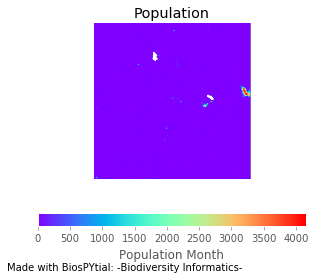

In [36]:
people.display_field(stats_dict,band=1,cmap=plt.cm.rainbow,title='Population')

In [37]:
## Elevation
elev_raster = elevation.getRaster()

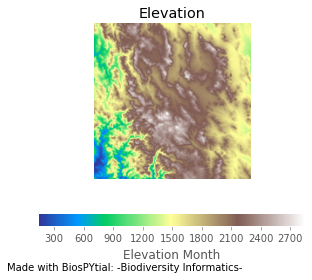

In [38]:
elevation.display_field(cmap=plt.cm.terrain,title='Elevation')

## DEM derived products

In [39]:
elevation.processDEM?

Signature: elevation.processDEM(option=1, **extra)
Docstring:
Processes different products using a DEM as input.
Currently implements:
    Parameters : 
        option : integer
            1 : Raw DEM (Elevation)
            2 : Slope (angle 0 - 90) 
            3 : Aspect Orientation of facet (0, 360) 
            4 : Hillshade (for visualising)
            
Returns : A GDALRaster
File:      /apps/raster_api/tools.py
Type:      instancemethod


In [40]:
srid = 900913
slope = elevation.processDEM(option=2,to_srid=srid)
aspect = elevation.processDEM(option=3,to_srid=srid)
hillshade = elevation.processDEM(option=4,to_srid=srid)

INFO For calculating these products it is necessary to provide a valid         SRID (projection). This is due to the fact that the map values and         the coordinates need to be in the same units.
INFO For calculating these products it is necessary to provide a valid         SRID (projection). This is due to the fact that the map values and         the coordinates need to be in the same units.
INFO For calculating these products it is necessary to provide a valid         SRID (projection). This is due to the fact that the map values and         the coordinates need to be in the same units.


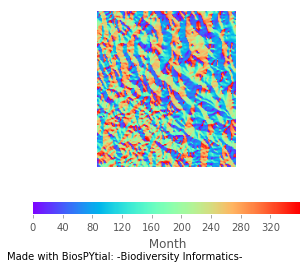

In [67]:
elevation.Aspect.display_field(cmap=plt.cm.rainbow)
#elevation.Slope.display_field(cmap=plt.cm.YlGnBu,vmin=0,vmax=10)
#elevation.Hillshade.display_field(cmap=plt.cm.gray)

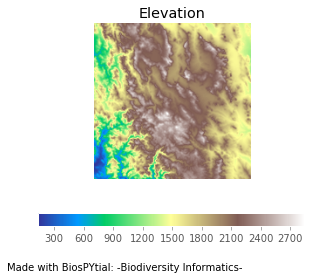

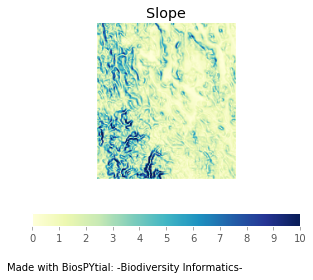

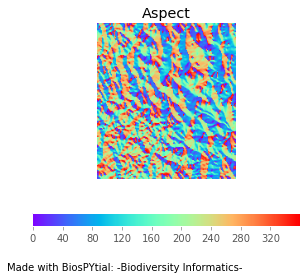

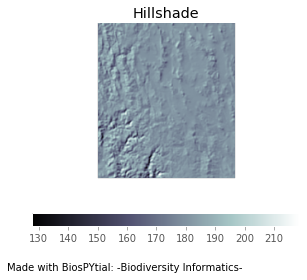

In [68]:
elevation.exportToJPG('elevation_example',title='Elevation',cmap=plt.cm.terrain)
slope.exportToJPG('slope_example',title='Slope',cmap=plt.cm.YlGnBu,vmin=0,vmax=10)
aspect.exportToJPG('aspect_example',title="Aspect",cmap=plt.cm.rainbow)
hillshade.exportToJPG('hillshade_example',title='Hillshade',cmap=plt.cm.bone)

In [97]:
mexico = Country.objects.filter(name='Mexico').get()

In [99]:
people = RasterData(WorldPopLatam2010,mexico.geom)

In [100]:
pp = people.getRaster()

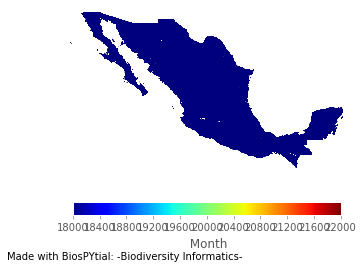

In [108]:
people.display_field(vmin=20000,vmax=20000)

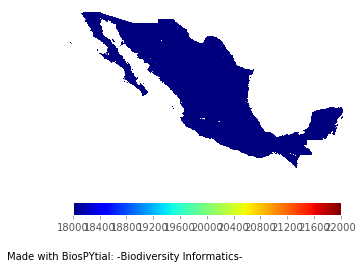

In [109]:
people.exportToJPG('mex_example',vmin=20000,vmax=20000)

In [ ]:
stats_dict = elevation.rasterdata.allBandStatistics()
elevation.display_field(stats_dict,band=1,cmap=plt.cm.bone_r,title='Shaded Relief')

In [ ]:
elevation.exportToJPG('shaded_relief',stats_dict,cmap=plt.cm.bone_r,title='Shaded Relief')

In [ ]:
dd = elevation.rasterdata.bands[0].data().flatten()

In [ ]:
import pandas as pd


In [ ]:
D  = pd.DataFrame(dd)

In [ ]:
D.quantile(0.3)

## Obtaining value at cell centroid using a resampled data
The steps are the following:
1. Let's take a resampling frame.
2. Extract the centroids of this resampled image
3. Extract the value with getValue()


In [ ]:
pixel_size = 0.25
small_people = people_low.rescale(pixel_size,algorithm='Bilinear')

In [ ]:
people_low.display_field()

In [ ]:
coordinates = people_low.getCoordinates()

In [ ]:
points = people_low.getCoordinatesAsGeometricPoints()

In [ ]:
npoints = people.getCoordinatesAsGeometricPoints()

In [ ]:
## Convert to Point geometry
from django.contrib.gis.geos import  GEOSGeometry
fx = lambda arr :'POINT(%s %s)'%(arr[0],arr[1])

In [ ]:
cs = coordinates.values

In [ ]:
cc = list(cs)

In [ ]:
points = map(lambda p : GEOSGeometry(p,srid=4326), map(fx,cc))

In [ ]:
%time vals = map(lambda p : elevation.getValue(p),points)
#%time vals2 = map(lambda p : people_low.getValue(p),points)

In [ ]:
delvalle = GEOSGeometry('POINT(-90.16 19.39)',srid=4326)

In [ ]:
people.getValue(delvalle)

In [ ]:
vals